

---


#  🟢 Plota Calendarplot para o Brasill para 2022-2025

---
**DADOS**:

 - Dados: Focos de calor do INPE na frequência anual - https://dataserver-coids.inpe.br/queimadas/queimadas/focos/csv/anual/EstadosBr_sat_ref/MG/

- Dados: Focos de calor do INPE na frequência mensal - https://dataserver-coids.inpe.br/queimadas/queimadas/focos/csv/mensal/Brasil/

---
**REALIZAÇÃO**:


- Realizado por: Enrique V. Mattos - 04/09/2025
- E-mail: enrique@unifei.edu.br
- GitHub: https://github.com/evmpython
- Lattes: http://lattes.cnpq.br/8010078550088178



---

# **1° Passo:** Preparando ambiente

In [ ]:
# instalações
!pip install -q ultraplot calplot

# Bibliotecas para manipulação de arquivos e sistema
import glob                                 # Lista arquivos em diretórios usando padrões (ex: *.nc)
import time                                 # Medição de tempo de execução e operações relacionadas a tempo

# Bibliotecas para computação numérica e dados
import numpy as np                          # Operações matemáticas eficientes com arrays multidimensionais
import pandas as pd                         # Manipulação e análise de dados em estruturas tabulares (DataFrames)
import xarray as xr                         # Trabalho com arrays multidimensionais rotulados (comum em dados científicos)

# Bibliotecas para visualização de dados
import matplotlib.pyplot as plt             # Criação de gráficos e visualizações 2D/3D (biblioteca base)
import ultraplot as uplt                    # Visualização especializada para dados meteorológicos
import seaborn as sns                       # Visualização estatística de dados (baseado no matplotlib)
import calplot                              # Criação de calendários de visualização de dados temporais

# Controle de avisos
import warnings                             # Gerenciamento de mensagens de alerta durante a execução
warnings.filterwarnings("ignore")           # Supressão de avisos para manter a saída limpa

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.3/132.3 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


# **2° Passo:** Lendo os Dados do INPE

## Lendo os dados de 2003-2024
- São os dados por `ANO` do `Brasil` do satélite de referência `AQUA`.

In [ ]:
%%time
# cria uma tabela vazia
df_2003_a_2024 = pd.DataFrame()

# FTP dos dados anual do satélite AQUA
url = 'https://dataserver-coids.inpe.br/queimadas/queimadas/focos/csv/anual/Brasil_sat_ref/'

# ano inicial e final: neste caso de 2003 a 2024
anoi, anof = '2003', '2025'

# loop dos meses
for ano in range(int(anoi), int(anof)):
    print(ano)

    # nome do arquivo
    filename = f'focos_br_ref_{str(ano)}.zip'

    # leitura da tabela: 2023
    df0 = pd.read_csv(f'{url}focos_br_ref_{str(ano)}.zip', compression='zip')

    # junta a tabela que foi lida com a anterior
    df_2003_a_2024 = pd.concat([df0, df_2003_a_2024], ignore_index=True)

# remove colunas
df_2003_a_2024.drop(['id_bdq','foco_id','pais'], axis=1, inplace=True)

# renomeia coluna
df_2003_a_2024.rename(columns={'data_pas': 'data'}, inplace=True)

# reposiciona as colunas
df_2003_a_2024 = df_2003_a_2024[['data','lat','lon','municipio','estado','bioma']]

# mostra o dataframe
df_2003_a_2024

2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
CPU times: user 22.2 s, sys: 4.31 s, total: 26.5 s
Wall time: 1min 9s


,data,lat,lon,municipio,estado,bioma
0,2024-01-02 17:04:00,-15.89572,-38.89957,BELMONTE,BAHIA,Mata Atlântica
1,2024-01-02 17:06:00,-7.49188,-38.88316,BREJO SANTO,CEARÁ,Caatinga
2,2024-01-02 17:06:00,-6.50564,-39.44122,CARIÚS,CEARÁ,Caatinga
3,2024-01-02 17:06:00,-6.50409,-39.43422,CARIÚS,CEARÁ,Caatinga
4,2024-01-02 17:06:00,-5.74166,-39.59352,MOMBAÇA,CEARÁ,Caatinga
...,...,...,...,...,...,...
5107968,2003-09-26 16:30:00,-11.71700,-49.33000,DUERÉ,TOCANTINS,Cerrado
5107969,2003-09-26 18:08:00,-13.65700,-57.39400,DIAMANTINO,MATO GROSSO,Cerrado
5107970,2003-10-07 16:13:00,-5.87600,-44.64400,TUNTUM,MARANHÃO,Cerrado
5107971,2003-10-09 17:37:00,-12.27900,-60.48900,VILHENA,RONDÔNIA,Amazônia


## Lendo os dados de 2025
- São os dados por `MÊS` do `Brasil` de `TODOS` satélites.

In [ ]:
%%time
# cria uma tabela
df_2025 = pd.DataFrame()

# FTP dos dados mensal de 2025 do satélite AQUA
url = 'https://dataserver-coids.inpe.br/queimadas/queimadas/focos/csv/mensal/Brasil/'

# loop dos meses de 2025, até o mês 09
for data in pd.date_range('20250101','20251001', freq='1M'):

    # extrai ano e mês
    ano = data.strftime('%Y')
    mes = data.strftime('%m')
    print(ano, mes)

    # nome do arquivo
    filename = f'focos_mensal_br_{ano}{mes}.csv'

    # leitura da tabela
    df0 = pd.read_csv(f'{url}{filename}')

    # junta a tabela que foi lida com a anterior
    df_2025 = pd.concat([df_2025, df0], ignore_index=True)

# seleciona apenas para MG e para o satélite de referência AQUA_M-T
#df_2025 = df_2025[ (df_2025['estado']=='MINAS GERAIS') & (df_2025['satelite']=='AQUA_M-T') ]
df_2025 = df_2025[ df_2025['satelite'] == 'AQUA_M-T' ]

# renomeia coluna
df_2025.rename(columns={'data_hora_gmt': 'data'}, inplace=True)

# reposiciona as colunas
df_2025 = df_2025[['data','lat','lon','municipio','estado','bioma']]

# mostra tabela
df_2025

2025 01
2025 02
2025 03
2025 04
2025 05
2025 06
2025 07
2025 08
2025 09
CPU times: user 5.95 s, sys: 630 ms, total: 6.58 s
Wall time: 28.2 s


,data,lat,lon,municipio,estado,bioma
1419,2025-01-01 16:52:00,-8.70136,-36.58537,CAPOEIRAS,PERNAMBUCO,Caatinga
1420,2025-01-01 16:52:00,-7.25636,-38.53855,BONITO DE SANTA FÉ,PARAÍBA,Caatinga
1421,2025-01-01 16:52:00,-7.60073,-37.72230,SOLIDÃO,PERNAMBUCO,Caatinga
1422,2025-01-01 16:52:00,-12.31578,-37.87934,ENTRE RIOS,BAHIA,Mata Atlântica
1423,2025-01-01 16:52:00,-12.30725,-37.89272,ENTRE RIOS,BAHIA,Mata Atlântica
...,...,...,...,...,...,...
1390123,2025-09-03 19:08:00,-3.20710,-60.60226,MANACAPURU,AMAZONAS,Amazônia
1390124,2025-09-03 19:08:00,-3.80178,-65.10154,ALVARÃES,AMAZONAS,Amazônia
1390125,2025-09-03 19:08:00,-5.27116,-60.41924,NOVO ARIPUANÃ,AMAZONAS,Amazônia
1390126,2025-09-03 19:08:00,-5.27282,-60.43021,NOVO ARIPUANÃ,AMAZONAS,Amazônia


## Junta os dados de 2003-2024 com 2025

In [ ]:
# junta os dataframes
df = pd.concat([df_2003_a_2024, df_2025], ignore_index=True)

# transforma a coluna "datahora" para o formato "datetime"
df['data'] = pd.to_datetime(df['data'])

# seta a coluna "datahora" como o índice da tabela
df.set_index('data', inplace=True)

# ordena a tabela pelo índice
df.sort_index(inplace=True)

# mostra o dataframe final
df

,lat,lon,municipio,estado,bioma
data,,,,,
2003-01-01 16:04:00,-15.62100,-41.66500,BERIZAL,MINAS GERAIS,Mata Atlântica
2003-01-01 16:04:00,-15.27600,-41.51400,TREMEDAL,BAHIA,Mata Atlântica
2003-01-01 16:04:00,-14.82900,-40.13300,NOVA CANAÃ,BAHIA,Mata Atlântica
2003-01-01 16:05:00,-10.67500,-37.03400,ROSÁRIO DO CATETE,SERGIPE,Mata Atlântica
2003-01-01 16:05:00,-10.15600,-36.17400,CORURIPE,ALAGOAS,Mata Atlântica
...,...,...,...,...,...
2025-09-03 19:08:00,-5.13636,-62.54185,TAPAUÁ,AMAZONAS,Amazônia
2025-09-03 19:08:00,-3.43706,-59.56544,CAREIRO DA VÁRZEA,AMAZONAS,Amazônia
2025-09-03 19:08:00,-5.27282,-60.43021,NOVO ARIPUANÃ,AMAZONAS,Amazônia


# **3° Passo:** Agrupando os dados por dia

In [ ]:
# mostra os dados que serão utilizados
df

,lat,lon,municipio,estado,bioma
data,,,,,
2003-01-01 16:04:00,-15.62100,-41.66500,BERIZAL,MINAS GERAIS,Mata Atlântica
2003-01-01 16:04:00,-15.27600,-41.51400,TREMEDAL,BAHIA,Mata Atlântica
2003-01-01 16:04:00,-14.82900,-40.13300,NOVA CANAÃ,BAHIA,Mata Atlântica
2003-01-01 16:05:00,-10.67500,-37.03400,ROSÁRIO DO CATETE,SERGIPE,Mata Atlântica
2003-01-01 16:05:00,-10.15600,-36.17400,CORURIPE,ALAGOAS,Mata Atlântica
...,...,...,...,...,...
2025-09-03 19:08:00,-5.13636,-62.54185,TAPAUÁ,AMAZONAS,Amazônia
2025-09-03 19:08:00,-3.43706,-59.56544,CAREIRO DA VÁRZEA,AMAZONAS,Amazônia
2025-09-03 19:08:00,-5.27282,-60.43021,NOVO ARIPUANÃ,AMAZONAS,Amazônia


In [ ]:
# seleciona apenas o Estado de MG
df_mg = df[df['estado']=='MINAS GERAIS']
df_mg

,lat,lon,municipio,estado,bioma
data,,,,,
2003-01-01 16:04:00,-15.62100,-41.66500,BERIZAL,MINAS GERAIS,Mata Atlântica
2003-01-02 16:46:00,-18.64100,-49.98900,IPIAÇU,MINAS GERAIS,Mata Atlântica
2003-01-06 16:22:00,-17.33400,-41.67500,ITAIPÉ,MINAS GERAIS,Mata Atlântica
2003-01-06 16:22:00,-18.31600,-43.27000,SERRA AZUL DE MINAS,MINAS GERAIS,Mata Atlântica
2003-01-06 16:22:00,-15.80100,-41.61600,CURRAL DE DENTRO,MINAS GERAIS,Mata Atlântica
...,...,...,...,...,...
2025-09-03 17:26:00,-16.30837,-45.69061,SÃO ROMÃO,MINAS GERAIS,Cerrado
2025-09-03 17:26:00,-17.04275,-46.46096,PARACATU,MINAS GERAIS,Cerrado
2025-09-03 17:26:00,-17.17605,-46.20148,JOÃO PINHEIRO,MINAS GERAIS,Cerrado


In [ ]:
# calculando a quantidade de focos de calor por dia
diaria_mg = df_mg.groupby(pd.Grouper(freq='1D')).count()['lat']
diaria_mg

,lat
data,
2003-01-01,1
2003-01-02,1
2003-01-03,0
2003-01-04,0
2003-01-05,0
...,...
2025-08-30,43
2025-08-31,0
2025-09-01,39


# **4° Passo:** Plota Figura

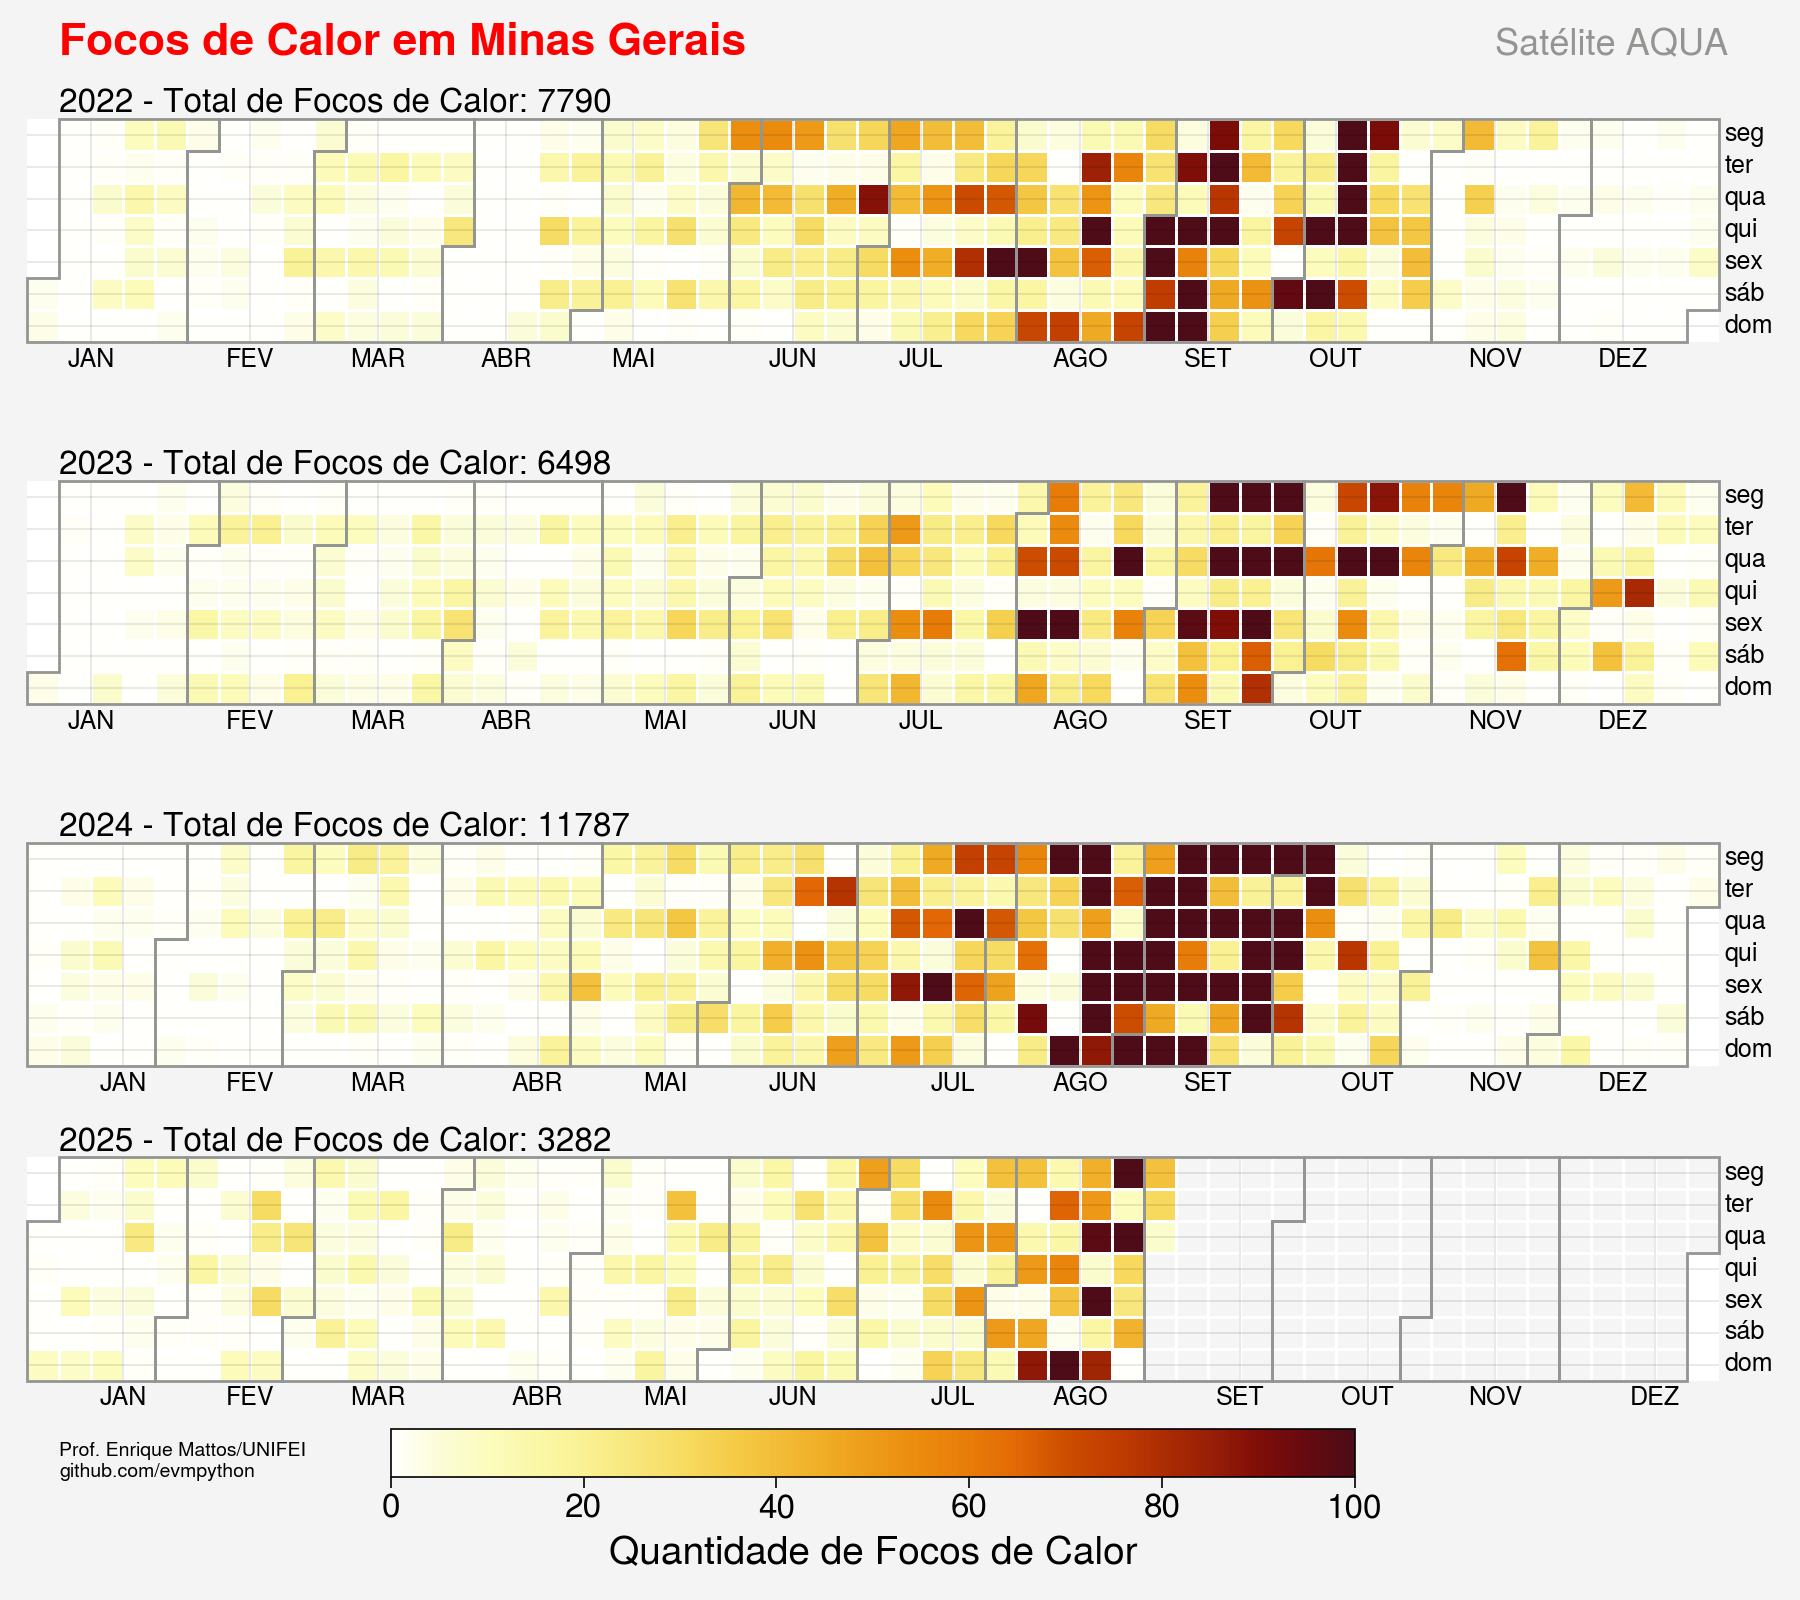

In [54]:
#========================================================#
#               DEFINIÇÕES INICIAIS
#========================================================#
# moldura da figura
fig, ax = plt.subplots(figsize=(9,8), nrows=4)

# labels dos "dias da semana" e "meses do ano"
dias = ['seg', 'ter', 'qua', 'qui', 'sex','sáb', 'dom']
meses = ['JAN', 'FEV', 'MAR', 'ABR', 'MAI', 'JUN', 'JUL', 'AGO', 'SET', 'OUT', 'NOV', 'DEZ']

#========================================================#
#                 FIGURA A) - 2022
#========================================================#
map1 = calplot.yearplot(diaria_mg.loc['2022'],
                        cmap='Oranges1',
                        daylabels=dias,
                        monthlabels=meses,
                        vmin=0,
                        vmax=100,
                        ax=ax[0])

#========================================================#
#                  FIGURA B) - 2023
#========================================================#
calplot.yearplot(diaria_mg.loc['2023'],
                 cmap='Oranges1',
                 daylabels=dias,
                 monthlabels=meses,
                 vmin=0,
                 vmax=100,
                 ax=ax[1])

#========================================================#
#                  FIGURA C) - 2024
#========================================================#
calplot.yearplot(diaria_mg.loc['2024'],
                 cmap='Oranges1',
                 daylabels=dias,
                 monthlabels=meses,
                 vmin=0,
                 vmax=100,
                 ax=ax[2])

#========================================================#
#                  FIGURA D) - 2025
#========================================================#
calplot.yearplot(diaria_mg.loc['2025'],
                 cmap='Oranges1',
                 daylabels=dias,
                 monthlabels=meses,
                 vmin=0,
                 vmax=100,
                 ax=ax[3])

#========================================================#
#                  DEMAIS DEFINIÇÕES
#========================================================#
# barra de cores
cb = fig.colorbar(map1.get_children()[1], orientation='horizontal', ticks=uplt.arange(0, 100, 20), shrink=0.75, ax=ax[3])
cb.ax.tick_params(labelsize=12)
cb.ax.tick_params(which='minor', width=0)
cb.set_label('Quantidade de Focos de Calor', fontsize=14)

# título geral do gráfico
ax[0].text(1, 9., 'Focos de Calor em Minas Gerais', fontsize=16, color='red', fontweight='bold')
ax[0].text(46, 9., 'Satélite AQUA', fontsize=13, color='gray')

# título de cada gráfico
ax[0].text(1., 7.2, f"2022 - Total de Focos de Calor: {np.sum(diaria_mg.loc['2022'].values)}", fontsize=12, color='black')
ax[1].text(1., 7.2, f"2023 - Total de Focos de Calor: {np.sum(diaria_mg.loc['2023'].values)}", fontsize=12, color='black')
ax[2].text(1., 7.2, f"2024 - Total de Focos de Calor: {np.sum(diaria_mg.loc['2024'].values)}", fontsize=12, color='black')
ax[3].text(1., 7.2, f"2025 - Total de Focos de Calor: {np.sum(diaria_mg.loc['2025'].values)}", fontsize=12, color='black')

# informação na figura
ax[3].text(1, -3.0, 'Prof. Enrique Mattos/UNIFEI\ngithub.com/evmpython', fontsize=7, color='black')

# salva figura
plt.tight_layout()
plt.savefig('09_calendarplot_mg.jpg', bbox_inches='tight', dpi=300)
plt.show()